# Visual and Data Analysis - FIFA 19 Players
- **Created by Andrés Segura Tinoco**
- **Created on May 1, 2019**

# 3. Principal Component Analysis
## Loading main libraries and data

In [1]:
# Load the Pandas libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Read FIFA 19 players data only using the current skill values
dataURL = "https://raw.githubusercontent.com/ansegura7/DataScience_FIFA19Data/master/data/fifa19_overall_data.csv"
data = pd.read_csv(dataURL)

## Selecting categorical and numeric variables

In [4]:
# UTIL FUNCTION - Get Dataframe Columns List By Type
def getColumnsByType(data, colType, equals, show):
    colList = []
    for col in data.columns:
        if (equals and str(data[col].dtype) == colType) or (not equals and str(data[col].dtype) != colType):
            colList.append(col)
            if show:
                print(str(data.columns.get_loc(col)) + " - " + col + " - " + str(data[col].dtype))
    return colList;

In [5]:
# Show object (string or date) type columns
objColList = getColumnsByType(data, "object", True, True)

2 - Name - object
4 - Photo - object
5 - Nationality - object
6 - Flag - object
9 - Club - object
10 - Club Logo - object
14 - Preferred Foot - object
18 - Work Rate - object
19 - Body Type - object
20 - Real Face - object
21 - Position - object
23 - Joined - object
24 - Loaned_From - object
25 - Contract Valid Until - object


In [6]:
# Show numeric (float or integer) type columns
numColList = getColumnsByType(data, "object", False, True)

0 - Order - int64
1 - ID - int64
3 - Age - int64
7 - Overall - int64
8 - Potential - int64
11 - Value € - float64
12 - Wage € - float64
13 - Special - int64
15 - International Reputation - float64
16 - Weak Foot - float64
17 - Skill Moves - float64
22 - Jersey Number - float64
26 - HeightMts - float64
27 - WeightLbs - float64
28 - LS - int64
29 - ST - int64
30 - RS - int64
31 - LW - int64
32 - LF - int64
33 - CF - int64
34 - RF - int64
35 - RW - int64
36 - LAM - int64
37 - CAM - int64
38 - RAM - int64
39 - LM - int64
40 - LCM - int64
41 - CM - int64
42 - RCM - int64
43 - RM - int64
44 - LWB - int64
45 - LDM - int64
46 - CDM - int64
47 - RDM - int64
48 - RWB - int64
49 - LB - int64
50 - LCB - int64
51 - CB - int64
52 - RCB - int64
53 - RB - int64
54 - Crossing - float64
55 - Finishing - float64
56 - HeadingAccuracy - float64
57 - ShortPassing - float64
58 - Volleys - float64
59 - Dribbling - float64
60 - Curve - float64
61 - FKAccuracy - float64
62 - LongPassing - float64
63 - BallContr

In [7]:
# Split data into header and skills dataframes
header = pd.DataFrame()
skills = pd.DataFrame()

for col in data.columns:
    if col in objColList:
        header[col] = data[col]
    else:
        skills[col] = data[col]

# Delete original dataset from memory
del data

In [8]:
# Show first 5 rows of header dataframe
header.head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned_From,Contract Valid Until
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,Left,Medium/ Medium,Messi,Yes,RF,1-Jul-04,NaN,2021
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,Right,High/ Low,C. Ronaldo,Yes,ST,10-Jul-18,NaN,2022
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,Right,High/ Medium,Neymar,Yes,LW,3-Aug-17,NaN,2022
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,Right,Medium/ Medium,Lean,Yes,GK,1-Jul-11,NaN,2020
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,Right,High/ High,Normal,Yes,RCM,30-Aug-15,NaN,2023


In [9]:
# Show first 5 rows of skills dataframe
skills.head()

,Order,ID,Age,Overall,Potential,Value €,Wage €,Special,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause €
0,0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,33,94,94,77000000.0,405000.0,2228,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,27,91,93,72000000.0,260000.0,1471,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,27,91,92,102000000.0,355000.0,2281,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Data Quality Process with Standardization

In [10]:
# Filter/Delete player with an overall below 85
threshold = 85
skills = skills.loc[skills["Overall"] >= threshold]
len(skills)

110

In [11]:
# Remove columns that are not relevant for the analysis
nonColumns = ["Order", "ID", "Overall", "Potential", "Value €", "Wage €", "Release Clause €"]
skills = skills.drop(nonColumns, axis = 1)
numColList = [e for e in numColList if e not in nonColumns]

In [12]:
# Columns size validation
len(skills.columns) == len(numColList)

True

In [13]:
# Replace NaN values with average of columns
skills = skills.fillna(skills.mean())

In [14]:
# Standardize the Data
x = skills.loc[:,numColList].values
x = StandardScaler().fit_transform(x)

# Show skills data in temporary dataframe
dfSkills = pd.DataFrame(data = x, columns = numColList).head()
dfSkills

,Age,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,HeightMts,WeightLbs,LS,ST,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.776706,0.724004,2.310325,0.743626,0.831174,-0.173639,-1.639945,-0.770754,0.818270,0.818270,...,0.595888,2.111447,-1.062921,-1.027494,-0.951904,-0.517153,-0.308874,-0.119577,-0.178222,-0.423847
1,1.361895,0.822752,2.310325,0.743626,1.693714,-0.548156,0.723295,0.560044,0.938657,0.938657,...,1.145324,1.955673,-1.267257,-0.919025,-1.059078,-0.475901,-0.308874,-0.119577,-0.178222,-0.303270
2,-0.686267,0.499921,2.310325,2.084591,1.693714,-0.173639,-0.983490,-1.269804,0.657753,0.657753,...,0.925549,1.799899,-1.308124,-1.172118,-0.701830,-0.393397,-0.393602,-0.119577,-0.136510,-0.303270
3,-0.393673,-2.052339,0.882596,-0.597339,-1.756444,-1.297189,1.379750,-0.271705,-2.713095,-2.713095,...,-1.327137,-2.250227,-1.798531,-1.280587,-1.416327,2.948037,2.826078,3.146120,2.908430,3.032701
4,-0.393673,1.024046,0.882596,2.084591,0.831174,-0.548156,-0.327034,-1.048004,0.577495,0.577495,...,0.815662,0.865254,0.367434,0.057193,-0.058784,-0.145883,-0.224145,-0.573146,-0.345068,-0.222885


## Correlation Matrix Plot

In [15]:
# Calculate skills correlations
corr = dfSkills.corr()

Text(0.5, 1.0, 'Correlation Matrix')

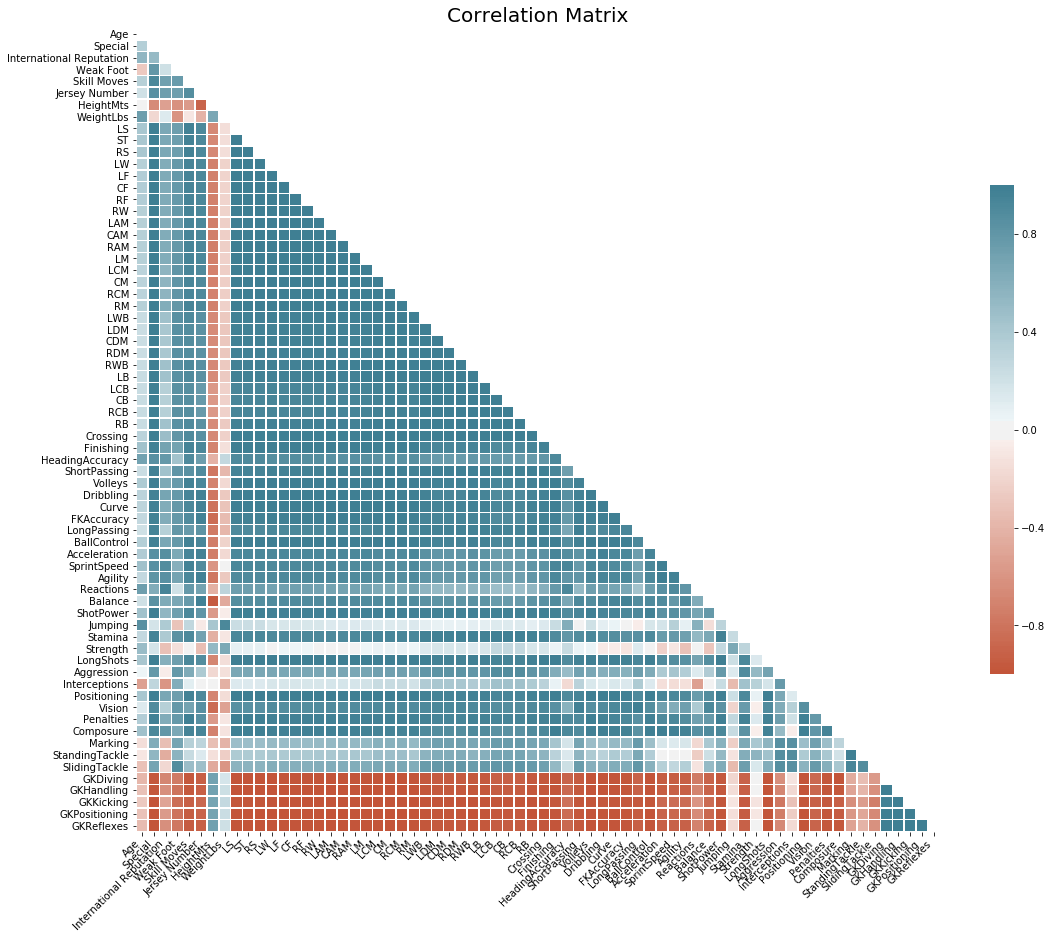

In [16]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, n = 200)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Correlation Matrix", fontsize = 20)

## PCA Process

**Definition:** Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.  Source: <a href="https://en.wikipedia.org/wiki/Principal_component_analysis" target="_blank" >Wikipedia</a>

In [17]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pcaData = pca.fit_transform(x)

In [18]:
# Create and show principal components DataFrame
pcaDF = pd.DataFrame(data = pcaData, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
pcaDF = pd.concat([pcaDF, header[["Name"]]], axis = 1)
pcaDF = pcaDF[pcaDF["PC1"].notnull()]
pcaDF

,PC1,PC2,PC3,PC4,PC5,Name
0,-4.593481,-5.478033,1.127111,1.252885,-2.286953,L. Messi
1,-4.080334,-3.406618,4.334073,-0.485612,-2.817897,Cristiano Ronaldo
2,-4.048185,-5.546171,0.505673,0.616553,-1.730906,Neymar Jr
3,17.658339,-2.364764,-0.405911,1.214861,-1.087192,De Gea
4,-4.982714,-1.635134,0.422099,1.768055,-0.096850,K. De Bruyne
5,-3.976332,-4.619820,0.033077,0.196805,-0.812913,E. Hazard
6,-4.938277,-1.234102,-1.675975,2.188508,-1.576703,L. Modrić
7,-3.226382,-1.905506,2.889849,0.854872,-1.617664,L. Suárez
8,-2.522402,3.734704,0.422654,-0.277002,-1.654164,Sergio Ramos
9,18.786267,-1.573208,-0.490691,-0.521749,-0.242004,J. Oblak


## PCA Variance Ratio

In [19]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
pca.explained_variance_ratio_

array([0.65597698, 0.14857827, 0.04305208, 0.03029529, 0.02500386])

In [20]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

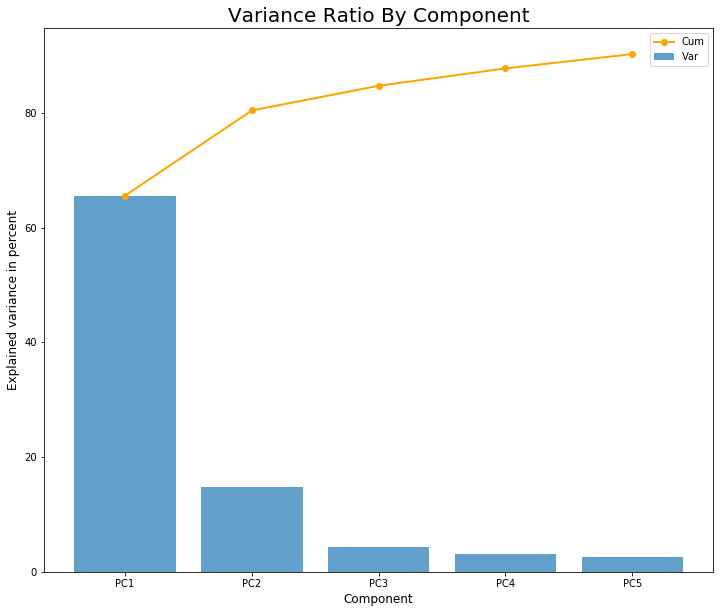

In [21]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.ylabel('Usage')
plt.title("Variance Ratio By Component", fontsize = 20)

# Plot setup
plt.xlabel("Component", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

## PCs Dependencies

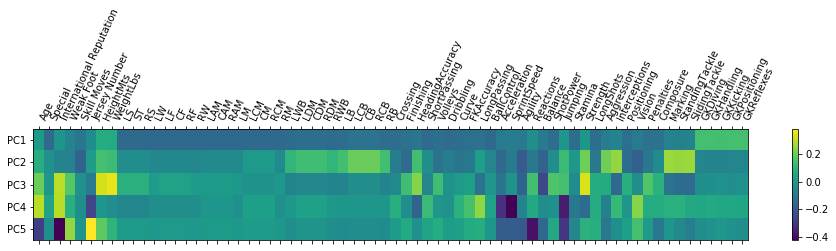

In [22]:
# Create matshow plot the PCs dependencies
matfig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = matfig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(skills.columns)), skills.columns, rotation = 65, ha = "left")
plt.show()

## PCA Plane Visualization

### 2D Chart: The first 2 components

In [23]:
# Show the total explained variance ratio of model: Only 2 components
sum(pca.explained_variance_ratio_[0:2]) * 100

80.45552504533683

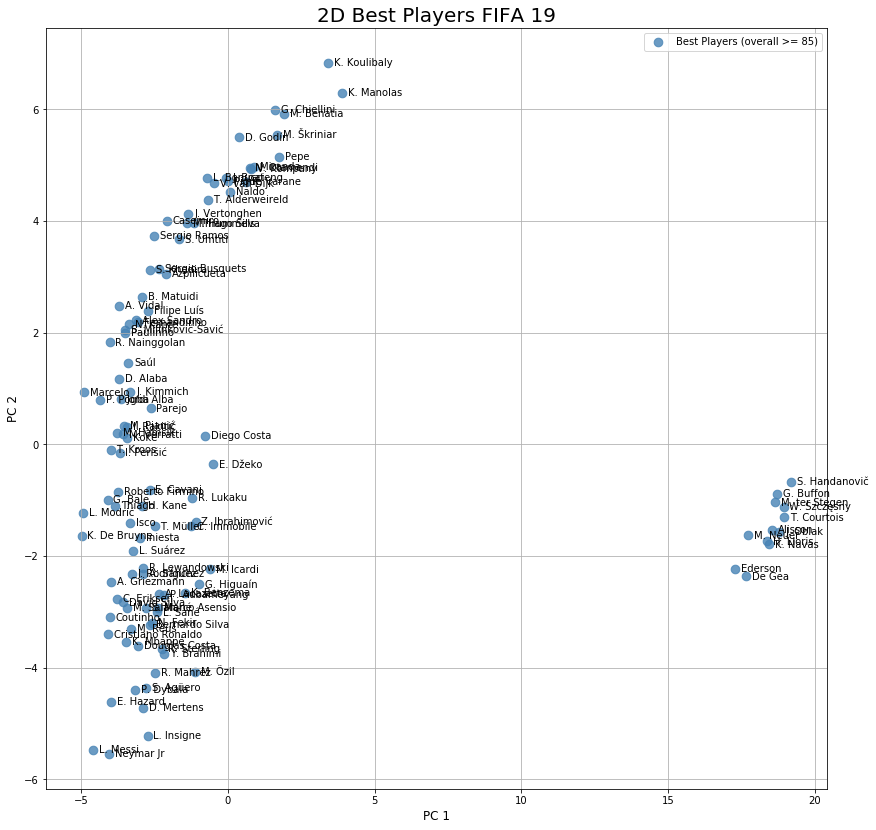

In [24]:
# Create scatter plot with players label
fig, ax3 = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.regplot(ax = ax3, data = pcaDF, x = "PC1", y = "PC2", fit_reg = False
                   , marker = "o", color = "#4682B4", scatter_kws = {"s": 75})

# Add annotations one by one with a loop
for ix in range(0, pcaDF.shape[0]):
    plot.text(pcaDF.PC1[ix] + 0.2, pcaDF.PC2[ix] - 0.05, pcaDF.Name[ix]
              , horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D Best Players FIFA 19", fontsize = 20)
ax3.legend(["Best Players (overall >= 85)"])
ax3.grid()

### 3D Chart: The first 3 components

In [25]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

84.76073306101465

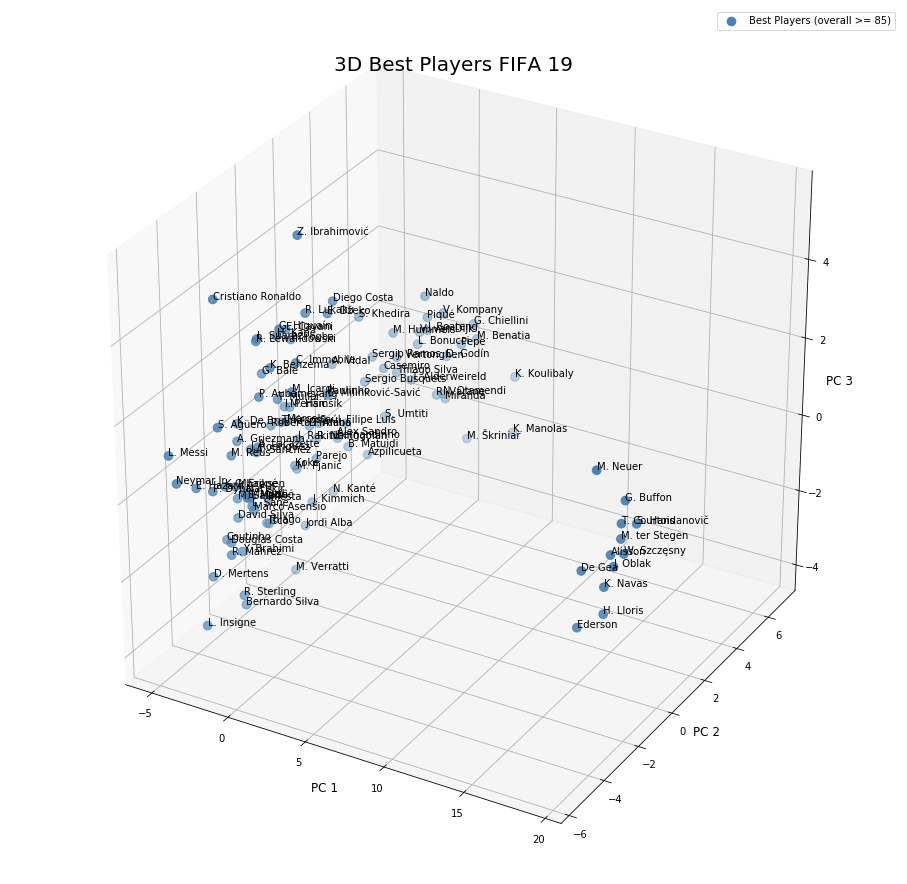

In [26]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = pcaDF.loc[:,["PC1"]].values
yy = pcaDF.loc[:,["PC2"]].values
zz = pcaDF.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#4682B4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), pcaDF.Name[ix]
             , horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D Best Players FIFA 19", fontsize = 20)
ax4.legend(["Best Players (overall >= 85)"])
ax4.grid()

---
<a href="https://github.com/ansegura7/DataScience_FIFA19Data">&laquo; GitHub Repository</a>